In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


In [3]:
dff=pd.read_csv('atlast_data.csv',index_col=0)
dff

,time,lon,lat,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
2576,1,23.75,51.75,4.711908,51.553411,2.401234,9.248417,12.351810,185.938477,5.65,0.05,92.97,0.25,101.22,2.97
2577,2,23.75,51.75,6.672050,46.996750,3.451919,17.601891,23.520398,225.714315,7.78,-0.69,91.62,0.19,101.08,4.43
2578,3,23.75,51.75,8.941137,41.624018,3.784783,16.831771,21.090757,240.643168,6.35,-2.21,92.66,0.16,100.83,1.99
2579,4,23.75,51.75,10.849893,40.627284,6.811707,30.603221,39.304944,322.964640,4.91,-0.49,94.47,0.42,99.36,4.11
2580,5,23.75,51.75,4.367971,59.191040,1.967694,6.767345,9.922366,192.327454,2.52,-3.39,81.22,0.41,99.75,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74423,88,29.25,50.75,2.374783,63.589274,0.443204,5.575825,6.442769,141.999288,20.41,9.20,85.01,4.26,99.61,1.49
74424,89,29.25,50.75,2.250813,55.532491,0.304400,4.095932,4.510385,142.136587,19.88,12.81,89.09,19.11,99.27,1.77
74425,90,29.25,50.75,1.334874,67.426381,0.322781,4.207631,4.545102,145.511047,18.63,11.64,84.04,3.05,99.19,3.31
74426,91,29.25,50.75,1.308244,59.159719,0.302089,3.470493,3.625675,143.809682,14.80,9.72,90.18,27.87,99.40,2.48


In [16]:
cor=dff.corr()
#cor=cor.drop(columns=['time','lon','lat'])
cor.drop(columns=['time','lon','lat'],axis=0)

,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
time,-0.415741,0.387441,-0.240323,-0.368899,-0.390421,-0.605185,0.826676,0.846596,-0.440903,0.224874,-0.222992,-0.080717
lon,-0.424547,0.030846,-0.461588,-0.207922,-0.254245,-0.258727,-0.042636,-0.032703,0.175312,0.085854,0.094838,-0.096535
lat,-0.188201,0.042263,-0.147747,-0.097050,-0.086878,-0.051185,-0.007945,0.002081,0.045270,-0.023346,0.340029,-0.002991
no2,1.000000,-0.521072,0.726618,0.624651,0.651734,0.751877,-0.277203,-0.243154,0.308719,-0.064895,-0.005493,0.074401
o3,-0.521072,1.000000,-0.059292,-0.308254,-0.297094,-0.510993,0.349467,0.175435,-0.673717,-0.169933,-0.075370,0.313442
so2,0.726618,-0.059292,1.000000,0.687509,0.715760,0.611125,-0.049439,-0.159459,-0.013148,-0.183186,-0.060192,0.199419
pm2.5,0.624651,-0.308254,0.687509,1.000000,0.989233,0.782036,-0.012987,-0.153268,0.282630,-0.116184,0.132733,-0.069917
pm10,0.651734,-0.297094,0.715760,0.989233,1.000000,0.777753,-0.032763,-0.179913,0.249959,-0.150461,0.143303,-0.046335
co,0.751877,-0.510993,0.611125,0.782036,0.777753,1.000000,-0.392282,-0.413195,0.439669,-0.085150,0.060516,-0.030763
tmax,-0.277203,0.349467,-0.049439,-0.012987,-0.032763,-0.392282,1.000000,0.876554,-0.353050,0.132974,-0.118298,-0.105003


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [17]:
no2=dff['no2']
no2=np.log(dff['no2'])
features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','opady'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,no2,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)
#features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lat','lon','opady','hum','tmax','tmin','time'],axis=1)


r-squered for train 0.5144904955236762
r-squered for test 0.5984930851273309


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


            coef        p-value
const  18.317942   5.465530e-86
time   -0.009295   1.221569e-40
lon    -0.154015  3.743441e-229
lat    -0.286804   3.044281e-58
tmax    0.010955   6.672837e-05
tmin   -0.000590   8.942222e-01
hum     0.018331   3.161573e-33


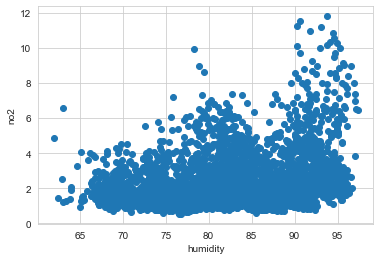

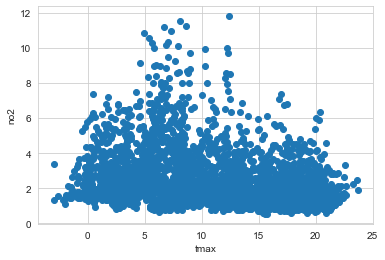

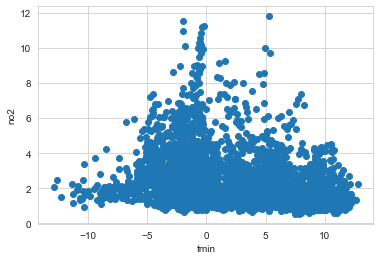

In [6]:
features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lat','lon','opady','hum','tmax','tmin','time'],axis=1)
Y = dff['no2']
X = dff['hum']
plt.scatter(X, Y)
plt.xlabel('humidity')
plt.ylabel("no2")
plt.show()
Y = dff['no2']
X = dff['tmax']
plt.scatter(X, Y)
plt.xlabel('tmax')
plt.ylabel("no2")
plt.show()
Y = dff['no2']
X = dff['tmin']
plt.scatter(X, Y)
plt.xlabel('tmin')
plt.ylabel("no2")
plt.show()


In [23]:
coordinates=['time','lon','lat','hum','tmax','tmin','opady','tysk','wind']
elem=['no2','o3','so2','pm10','co','pm2.5']

def regretion(dependent,independent):
    print(dependent,independent)
    x = np.array(dff[dependent]).reshape((-1, 1))
    y = np.array(dff[independent])
    #linaer 1
    X_train,X_test,Y_train,Y_test = train_test_split (x,y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #arrays for other regressions
    x_ln=np.log(x)
    x_ln.reshape((-1,1))
    x_1x=1/(x)
    x_1x.reshape((-1,1))
    y_ln=np.log(y)
    y_1y=1/(y)
    #2
    X_train,X_test,Y_train,Y_test = train_test_split (x,y_1y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #3
    X_train,X_test,Y_train,Y_test = train_test_split (x,y_ln,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #4
    X_train,X_test,Y_train,Y_test = train_test_split (x_1x,y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #5

    X_train,X_test,Y_train,Y_test = train_test_split (x_1x,y_1y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #6
    X_train,X_test,Y_train,Y_test = train_test_split (x_1x,y_ln,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #7
    X_train,X_test,Y_train,Y_test = train_test_split (x_ln,y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #8
    X_train,X_test,Y_train,Y_test = train_test_split (x_ln,y_1y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #9
    X_train,X_test,Y_train,Y_test = train_test_split (x_ln,y_ln,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #10 polinom 2 x y
    print('poli 2 y')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #11 polinom 3 x y
    print('poli 3 y')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #12 poli 2 x lny
    print('poli 2 ln y')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_ln, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #13 poli 3 x lny
    print('poli 3 ln y')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_ln, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    print('bla')
    print('\n')
for i in range(4):
    regretion(coordinates[i],elem[0])
#regretion(coordinates[0],elem[0])


time no2
r-squered for train 0.17056870263622503
r-squered for test 0.1816767764382149
       coef        p-value
0  3.549333   0.000000e+00
1 -0.024006  1.201332e-109


r-squered for train 0.21424127436108198
r-squered for test 0.22923930937262016
       coef        p-value
0  0.329075  1.651508e-220
1  0.004736  8.704502e-141


r-squered for train 0.21204843571085663
r-squered for test 0.23027639000492184
       coef        p-value
0  1.167086   0.000000e+00
1 -0.009342  3.497960e-139


r-squered for train 0.06688733448544404
r-squered for test 0.03791643656750865
       coef       p-value
0  2.250799  0.000000e+00
1  3.409720  9.623940e-42


r-squered for train 0.05559075025061633
r-squered for test 0.04459260658563535
       coef       p-value
0  0.578338  0.000000e+00
1 -0.547154  8.706546e-35


r-squered for train 0.06675269171998488
r-squered for test 0.04811087346636078
       coef       p-value
0  0.669362  0.000000e+00
1  1.188836  1.166053e-41


r-squered for train 0.1726313

In [26]:
def regretion2(dependent,independent):
    print(dependent,independent)
    x = np.array(dff[dependent]).reshape((-1, 1))
    y = np.array(dff[independent])
    #linaer 1
    X_train,X_test,Y_train,Y_test = train_test_split (x,y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')

    #arrays for other regressions

    y_ln=np.log(y)
    y_1y=1/(y)
    #2
    X_train,X_test,Y_train,Y_test = train_test_split (x,y_1y,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #3
    X_train,X_test,Y_train,Y_test = train_test_split (x,y_ln,test_size=0.2,random_state=10)
    model = LinearRegression().fit(X_train,Y_train)
    print("r-squered for train",model.score(X_train,Y_train))
    print("r-squered for test",model.score(X_test,Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #10 polinom 2 x y
    print('poli 2  y')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #11 polinom 3 x y
    print('poli 3  y')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #12 poli 2 x lny
    print('poli 2 ln y')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_ln, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    #13 poli 3 x lny
    print('poli 3 ln y')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_ln, test_size=0.2, random_state=10)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train, Y_train)
    print("r-squered for train", pol_reg.score(X_train, Y_train))
    print("r-squered for test", pol_reg.score(X_test, Y_test))
    x_incl_const=sm.add_constant(X_train)
    model = sm.OLS(Y_train,x_incl_const)
    results=model.fit()
    dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
    print(dd)
    print('\n')
    print('bla')
    print('\n')
regretion2(coordinates[4],elem[0])
regretion2(coordinates[5],elem[0])

tmax no2
r-squered for train 0.07258509565460125
r-squered for test 0.09348346279917152
       coef       p-value
0  3.149729  0.000000e+00
1 -0.065133  2.787798e-45


r-squered for train 0.10514585177070135
r-squered for test 0.12388510614356096
       coef        p-value
0  0.397532  1.705711e-275
1  0.013799   6.642814e-66


r-squered for train 0.0998095651434261
r-squered for test 0.1247121051210267
       coef       p-value
0  1.025897  0.000000e+00
1 -0.026657  1.782543e-62


poli 2  y
r-squered for train 0.08539698677711605
r-squered for test 0.11151713821674303
       coef        p-value
0  2.784929  1.758077e-207
1  0.039269   2.683535e-02
2 -0.004838   1.307968e-09


poli 3  y
r-squered for train 0.10647663011694308
r-squered for test 0.1218610429500977
       coef        p-value
0  2.351124  2.451246e-114
1  0.310718   1.189668e-15
2 -0.037516   9.314132e-19
3  0.001027   4.074723e-15


poli 2 ln y
r-squered for train 0.10725761926871336
r-squered for test 0.1370044170748828

In [35]:
no2=dff['no2']
no2=1/no2
features=dff.drop(['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lat','lon','opady','hum','tmax','tmin'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,no2,test_size=0.2,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
a=(regr.intercept_)
b=(regr.coef_)
no2_time=a+features*b
no2_time=pow(no2_time,-1)

r-squered for train 0.21424127436108198
r-squered for test 0.22923930937262016


In [36]:
no21=dff['no2']

no2=np.log(no21)
features=dff.drop(['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lat','opady','hum','tmax','tmin','time'],axis=1)
features=1/features
X_train,X_test,Y_train,Y_test = train_test_split (features,no2,test_size=0.2,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
a=(regr.intercept_)
b=(regr.coef_)
no2_lon=a+features*b
no2_lon=pow(2.71828,no2_lon)

r-squered for train 0.21318157225262402
r-squered for test 0.2558047277636949


In [37]:
no2=dff['no2']
no2=1/no2
features=dff.drop(['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lon','opady','hum','tmax','tmin','time'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,no2,test_size=0.2,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
a=(regr.intercept_)
b=(regr.coef_)
no2_lat=a+features*b
no2_lat=pow(no2_lat,-1)

r-squered for train 0.04284080256158851
r-squered for test 0.05872286245791347


In [47]:
no2=dff['no2']

features=dff.drop(['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lon','opady','lat','tmax','tmin','time'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,no2,test_size=0.2,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
a=23.48
b=-0.587
c=0.00399
no2_hum=a+features*b+c*pow(features,2)
no2_hum=np.array(no2_hum)
no2_hum

r-squered for train 0.09755390503576278
r-squered for test 0.08574503105452302


array([[3.39385939],
       [3.19201536],
       [3.34622364],
       ...,
       [2.32877918],
       [2.99274528],
       [2.01563934]])

In [39]:
no2=dff['no2']
features=dff.drop(['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lon','opady','lat','hum','tmin','time'],axis=1)
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(features)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, no2, test_size=0.2, random_state=10)
pol_reg = LinearRegression()
pol_reg.fit(X_train, Y_train)
print("r-squered for train", pol_reg.score(X_train, Y_train))
print("r-squered for test", pol_reg.score(X_test, Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
a=2.3511
b=0.310718
c=-0.0475
d=0.001
no2_tmax=a+features*b+c*pow(features,2)+d*pow(features,3)
no2_tmax=np.array(no2_tmax)

r-squered for train 0.10647663011694308
r-squered for test 0.1218610429500977


In [42]:
no21=dff['no2']
no2=np.log(no21)
features=dff.drop(['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lon','opady','lat','hum','tmax','time'],axis=1)
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(features)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, no2, test_size=0.2, random_state=10)
pol_reg = LinearRegression()
pol_reg.fit(X_train, Y_train)
print("r-squered for train", pol_reg.score(X_train, Y_train))
print("r-squered for test", pol_reg.score(X_test, Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
a=0.862118
b=-0.027
c=-0.0004
d=0.0002
no2_tmin=a+features*b+c*pow(features,2)+d*pow(features,3)
no2_tmin=np.array(no2_tmin)
no2_tmin

r-squered for train 0.10661037198239232
r-squered for test 0.12868998663595244


array([[0.86076703],
       [0.88049186],
       [0.91767559],
       ...,
       [0.80906195],
       [0.74555265],
       [0.72191192]])

In [41]:
df1 = pd.DataFrame({'no2': no21,'f(time)': no2_time['time'],'f(lon)': no2_lon['lon'],'f(lat)': no2_lat['lat'],'hum':no2_hum,'tmax':no2_tmax,'tmin':no2_tmin})
chemical=df1['no2']
chemical=np.log(chemical)
features=df1.drop(columns=['no2'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chemical,test_size=0.1,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)
df1

ValueError: Data must be 1-dimensional

In [56]:
df1 = pd.DataFrame({'no2': no21,'f(time)': no2_time['time'],'f(lon)': no2_lon['lon'],'f(lat)': no2_lat['lat']})
df1['f(hum)']=no2_hum
df1['f(tmax)']=no2_tmax
df1['f(tmin)']=no2_tmin
chemical=df1['no2']
chemical=np.log(chemical)
features=df1.drop(columns=['no2','f(tmin)'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chemical,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.5305685483161755
r-squered for test 0.6302911339398536
             coef        p-value
const   -2.798027  1.199407e-194
f(time)  0.339744   1.118514e-46
f(lon)   0.508366  5.734830e-267
f(lat)   0.614090   1.827100e-60
f(hum)   0.265265   3.084147e-68
f(tmax)  0.016167   2.158855e-03


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
